## 1 Ennvironment preparation


In [1]:
# general imports
import json
import numpy as np
import os
from os import walk
import time
import h5py
import cv2
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
# mount the google drive folder to access to all the files in there
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Add the folder called utils (and utils/pyimagesearch) that has all the cusotms
# modueles in .py files

# Some of the functions defined in those files will be used later

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/TFG/utils')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/TFG/utils/pyimagesearch')

In [4]:
# PATHS of different files and folders of the project

# Project Root folder
PROJECT_ROOT = '/content/drive/My Drive/Colab Notebooks/TFG'

# Folder of the HDF5 (videos) files
HDF5_FOLDER = PROJECT_ROOT + "/HDF5 files/"

# Folder of the final labeled sequences
JSON_FOLDER = PROJECT_ROOT + "/data/characteristics_tracks/"

## 2 Data analysis


### 2.1 Sequence and Detection analysis




Look for all the sequences which are useble. In other words, look for all the sequnces which have linked a HDF5 file with a JSON file and vice versa.

In [5]:
# All the files in .h5 and .json
all_HDF5 = []
all_labeled = []

# The .h5 files which do not have assigned a .json file and viceversa
missing_HDF5 = []
missing_labeled = []

# Adquire all the HDF5 names
for (dirpathHDF5, dirnamesHDF5, filenamesHDF5) in walk(HDF5_FOLDER):
    for fileHDF5 in filenamesHDF5:
        if fileHDF5.endswith('.h5'):
            all_HDF5.append(fileHDF5[:-3])

# Adquire all the .json names
for (dirpathJSON, dirnamesJSON, filenamesJSON) in walk(JSON_FOLDER):
    for fileJSON in filenamesJSON:
        if fileJSON.endswith('.h5.json'):
            all_labeled.append(fileJSON[:-8])

# Detect which files are missing
for filename in all_HDF5:
    if not filename in all_labeled:
        missing_labeled.append(filename)
    
for filename in all_labeled:
    if not filename in all_HDF5:
        missing_HDF5.append(filename)

# Display
if len(missing_HDF5)==0 and len(missing_labeled)==0:
    print('All the files have assigned a JSON file and a HDF5 file.')

elif len(missing_labeled)>0 and len(missing_HDF5)==0:
    print('All the JSON files have assigned a HDF5 file.')
    print('The following HDF5 files do not have assigned a JSON file:')
    for filename in missing_labeled:
        print('\t{}'.format(filename))

elif len(missing_labeled)==0 and len(missing_HDF5)>0:
    print('All the HDF5 files have assigned a JSON file.')
    print('The following JSON files do not have assigned a HDF5 file:')
    for filename in missing_HDF5:
        print('\t{}'.format(filename))

else:
    print('The following HDF5 files do not have assigned a JSON file:')
    for filename in missing_labeled:
        print('\t{}'.format(filename))
    print('The following JSON files do not have assigned a HDF5 file:')
    for filename in missing_HDF5:
        print('\t{}'.format(filename))

The following HDF5 files do not have assigned a JSON file:
	20180918.045_AEQ50
The following JSON files do not have assigned a HDF5 file:
	20180906.036_AEQ10
	20180906.036_AEQ51


So we conclude that the usable files, which have both .json and .h5 files, are:

In [6]:
usable_sequences = ['20171207.039_AEQ11', '20171207.043_AEQ11',
                    '20180918.036_AEQ50', '20180918.038_AEQ50',
                    '20180918.040_AEQ50', '20180919.007_AEQ40',
                    '20180920.034_AEQ11', '20181002.028_AEQ20',
                    '20181004.038_AEQ10', '20181004.038_AEQ20',
                    '20181004.038_AEQ40', '20181004.046_AEQ20',
                    '20181004.046_AEQ40', '20181004.046_AEQ50']

To facilitate the visualization of the filenames, the following functions link every file name to a number and vice versa:

In [7]:
def seq2num(seq):
    """
    Link a string sequence filename to a number
    - seq:      string with the filename
    - return:   int
    """
    num = -1
    if '20171207.039_AEQ11' in seq:
        num = 1
    elif '20171207.043_AEQ11' in seq:
        num = 2
    elif '20180918.036_AEQ50' in seq:
        num = 3
    elif '20180918.038_AEQ50' in seq:
        num = 4
    elif '20180918.040_AEQ50' in seq:
        num = 5
    elif '20180919.007_AEQ40' in seq:
        num = 6
    elif '20180920.034_AEQ11' in seq:
        num = 7
    elif '20181002.028_AEQ20' in seq:
        num = 8
    elif '20181004.038_AEQ10' in seq:
        num = 9
    elif '20181004.038_AEQ20' in seq:
        num = 10
    elif '20181004.038_AEQ40' in seq:
        num = 11
    elif '20181004.046_AEQ20' in seq:
        num = 12
    elif '20181004.046_AEQ40' in seq:
        num = 13
    elif '20181004.046_AEQ50' in seq:
        num = 14
        
    return num

In [8]:
def num2seq(num):
    """
    Link every number between 1 and 14 to a sequence name
    - num:      int
    - return:   string with the linked filename
    """
    seq = ''
    if num == 1:
        seq = '20171207.039_AEQ11'
    elif num == 2:
        seq = '20171207.043_AEQ11'
    elif num == 3:
        seq ='20180918.036_AEQ50'
    elif num == 4:
        seq = '20180918.038_AEQ50'
    elif num == 5:
        seq = '20180918.040_AEQ50'
    elif num == 6:
        seq = '20180919.007_AEQ40'
    elif num == 7:
        seq = '20180920.034_AEQ11'
    elif num == 8:
        seq = '20181002.028_AEQ20'
    elif num == 9:
        seq = '20181004.038_AEQ10'
    elif num == 10:
        seq = '20181004.038_AEQ20'
    elif num == 11:
        seq = '20181004.038_AEQ40'
    elif num == 12:
        seq = '20181004.046_AEQ20'
    elif num == 13:
        seq = '20181004.046_AEQ40'
    elif num == 14:
        seq = '20181004.046_AEQ50'
    
    return seq 

Load the data file which contains all the possibilities of the file names. It is useful to avoid any undesirable external file.

In [9]:
# Load the data.json file

# cusotm imports for this block
from JSONLoader import loadData

path_data = PROJECT_ROOT + '/data.json'
data = loadData(path_data)

Now, let's count all the detections we have. It is done both for frame-by-frame detections and for track detections.

In [10]:
# cusotm imports for this block
from JSONLoader import loadData

# Counters of all the TOTAL FRAMES with NoHotSpots, HotSpots and Anomalies
nNoHotSpot_fr = 0  # detection[6] == 0
nHotSpot_fr = 0    # detection[6] == 1
nAnomaly_fr = 0    # detection[6] == 2

# Counters of all the TOTAL TRACKS being NoHotSpots, HotSpots and Anomalies
nNoHotSpot_tr = 0  # detection[6] == 0
nHotSpot_tr = 0    # detection[6] == 1
nAnomaly_tr = 0    # detection[6] == 2

for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:
            filename, _= os.path.splitext(os.path.basename(file))

            aux = filename.split('_')
            xp = aux[0]
            port =aux[1]

            # FRAME-BY-FRAME
            # Counter of frames with NoHotSpots of the actual file
            nNoHotSpot_fr_i = 0

            # Counter of frames with HotSpots of the actual file
            nHotSpot_fr_i = 0

            # Counter of frames with Anomalies of the actual file
            nAnomaly_fr_i = 0

            # TRACKS
            # Counter of tracks which are NoHotSpots of the actual file
            nNoHotSpot_tr_i = 0

            # Counter of tracks which are HotSpots of the actual file
            nHotSpot_tr_i = 0

            # Counter of tracks which are Anomalies of the actual file
            nAnomaly_tr_i = 0

            # Actual trackID
            actualTrackID = -1  # detection[1]
           
            if [xp, port] in data:
                nNoHotSpot_fr_i = 0
                nHotSpot_fr_i = 0
                nAnomaly_fr_i = 0
                nNoHotSpot_tr_i = 0
                nHotSpot_tr_i = 0
                nAnomaly_tr_i = 0

                try:
                    filename = JSON_FOLDER + file + '.json'
                    detections = loadData(filename)

                    # FRAME-BY-FRAME
                    for detection in detections:
                        if detection[6] == 0:
                            nNoHotSpot_fr_i = nNoHotSpot_fr_i + 1
                        elif detection[6] == 1:
                            nHotSpot_fr_i = nHotSpot_fr_i + 1
                        elif detection[6] == 2:
                            nAnomaly_fr_i = nAnomaly_fr_i + 1

                    # TRACKS
                    for detection in detections:
                        if actualTrackID != detection[1]:                           
                            if detection[6] == 0:
                                nNoHotSpot_tr_i = nNoHotSpot_tr_i + 1
                            elif detection[6] == 1:
                                nHotSpot_tr_i = nHotSpot_tr_i + 1
                            elif detection[6] == 2:
                                nAnomaly_tr_i = nAnomaly_tr_i + 1
                        
                        actualTrackID = detection[1]
            
                    print('{} ({})'.format(file, seq2num(file)))

                    print('\tFRAME-BY-FRAME:')
                    print('\tNumber of NoHotSpots: {}'.format(nNoHotSpot_fr_i))
                    print('\tNumber of HotSpots: {}'.format(nHotSpot_fr_i))
                    print('\tNumber of Anomalies: {}'.format(nAnomaly_fr_i))

                    print('\tTRACK:')
                    print('\tNumber of NoHotSpots: {}'.format(nNoHotSpot_tr_i))
                    print('\tNumber of HotSpots: {}'.format(nHotSpot_tr_i))
                    print('\tNumber of Anomalies: {}'.format(nAnomaly_tr_i))

                    nNoHotSpot_fr = nNoHotSpot_fr + nNoHotSpot_fr_i
                    nHotSpot_fr = nHotSpot_fr + nHotSpot_fr_i
                    nAnomaly_fr = nAnomaly_fr + nAnomaly_fr_i

                    nNoHotSpot_tr = nNoHotSpot_tr + nNoHotSpot_tr_i
                    nHotSpot_tr = nHotSpot_tr + nHotSpot_tr_i
                    nAnomaly_tr = nAnomaly_tr + nAnomaly_tr_i

                except Exception as e:
                    print('Error opening file')
                    print(e)

print("==============================================================")
print("==============================================================")
print('Number of the TOTAL FRAME detections as NoHotSpots: {}'.format(nNoHotSpot_fr))
print('Number of the TOTAL FRAME detections as HotSpots: {}'.format(nHotSpot_fr))
print('Number of the TOTAL FRAME detections as Anomalies: {}'.format(nAnomaly_fr))
print("--------------------------------------------------------------")
print('Number of the TOTAL TRACKS as NoHotSpots: {}'.format(nNoHotSpot_tr))
print('Number of the TOTAL TRACKS detections as HotSpots: {}'.format(nHotSpot_tr))
print('Number of the TOTAL TRAKCS detections as Anomalies: {}'.format(nAnomaly_tr))
print("==============================================================")
print('Number of the TOTAL FRAME DETECTIONS: {}'.format(nNoHotSpot_fr+nHotSpot_fr+nAnomaly_fr))
print("--------------------------------------------------------------")
print('Number of the TOTAL TRACKS DETECTED: {}'.format(nNoHotSpot_tr+nHotSpot_tr+nAnomaly_tr))

20171207.039_AEQ11.h5 (1)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 5473
	Number of HotSpots: 0
	Number of Anomalies: 191
	TRACK:
	Number of NoHotSpots: 49
	Number of HotSpots: 0
	Number of Anomalies: 3
20171207.043_AEQ11.h5 (2)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 7887
	Number of HotSpots: 0
	Number of Anomalies: 279
	TRACK:
	Number of NoHotSpots: 74
	Number of HotSpots: 0
	Number of Anomalies: 3
20180918.036_AEQ50.h5 (3)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 8592
	Number of HotSpots: 673
	Number of Anomalies: 877
	TRACK:
	Number of NoHotSpots: 56
	Number of HotSpots: 3
	Number of Anomalies: 8
20180918.038_AEQ50.h5 (4)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 7325
	Number of HotSpots: 433
	Number of Anomalies: 829
	TRACK:
	Number of NoHotSpots: 62
	Number of HotSpots: 2
	Number of Anomalies: 6
20180918.040_AEQ50.h5 (5)
	FRAME-BY-FRAME:
	Number of NoHotSpots: 6702
	Number of HotSpots: 255
	Number of Anomalies: 398
	TRACK:
	Number of NoHotSpots: 83
	Number of HotSpots: 1
	Number of An

### 2.2 Bounding Box analysis

BBox length study:


*   Histogram with the maximum side length of the Bounding Boxes
*   2D-Histogram with the maximum side length of the Bounding Boxes and the form factor (min_side_len/max_side_len)



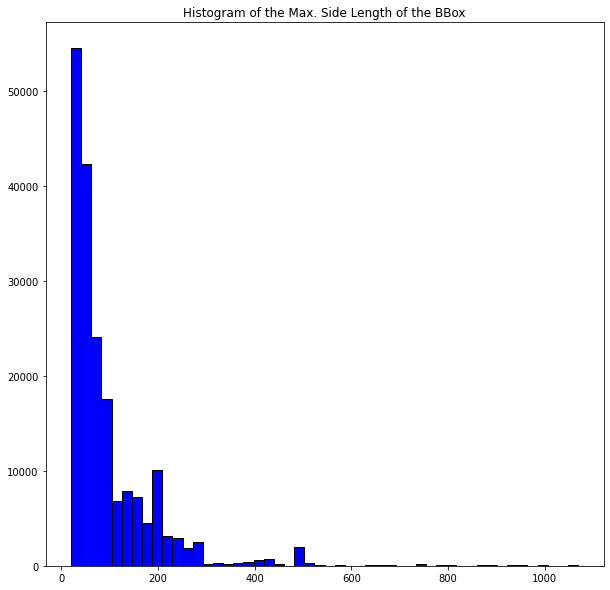

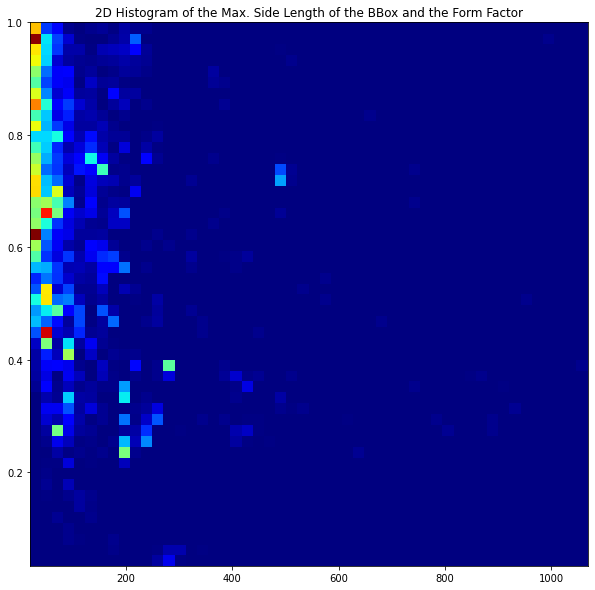

In [11]:
max_len = []
form_factor = []
for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:
            filename, _= os.path.splitext(os.path.basename(file))

            aux = filename.split('_')
            xp = aux[0]
            port = aux[1]

            if [xp, port] in data:

                try:
                    filename = JSON_FOLDER + file + '.json'
                    detections = loadData(filename)

                    for detection in detections:
                        xdif = detection[4] - detection[2]
                        ydif = detection[5] - detection[3]
                        max_len.append(max(xdif, ydif))
                        if xdif < ydif:
                            form_factor.append(xdif/ydif)
                        else:
                            form_factor.append(ydif/xdif)
                    
                except Exception as e:
                    print('Error opening file')
                    print(e)

plt.figure(figsize=(10,10))
plt.title('Histogram of the Max. Side Length of the BBox')                    
_ = plt.hist(max_len, bins=50, color = "b", ec="black")
plt.show()

plt.figure(figsize=(10,10))
plt.title('2D Histogram of the Max. Side Length of the BBox and the Form Factor')  
_ = plt.hist2d(max_len, form_factor, bins=50, cmap=plt.cm.jet)
plt.show()

Seeing the above histogram we can conclude that almost all the BBoxes have a maximum side length of at most 250 pixels. We can also see that almost all the detections have a reduced form factor. In other words, both sides are quite similar.

Taking into account other factors such as the input size of some of the pre-trained Neural Networks, the length of the sides of the square chosen is 224 pixels. In the following block we can see that with the length mentioned before the 92.32% of the Bounding Boxes are completely inside.

In [12]:
MAX_SQUARE_LEN = 224

counter = 0
total_counter = 0
for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        if file.endswith('.h5') and file[:-3] in usable_sequences:
            filename, _= os.path.splitext(os.path.basename(file))

            aux = filename.split('_')
            xp = aux[0]
            port = aux[1]

            if [xp, port] in data:

                try:
                    filename = JSON_FOLDER + file + '.json'
                    detections = loadData(filename)

                    for detection in detections:
                        total_counter = total_counter + 1
                        xdif = detection[4] - detection[2]
                        ydif = detection[5] - detection[3]
                        if xdif<MAX_SQUARE_LEN and ydif<MAX_SQUARE_LEN:
                            counter = counter + 1
                   
                except Exception as e:
                    print('Error opening file')
                    print(e)

print('The {:.2f}% of the BBoxes are completely inside of a {} pixels square'.format((counter/total_counter)*100,MAX_SQUARE_LEN))

The 92.32% of the BBoxes are completely inside of a 224 pixels square


### 2.3 Track analysis

Track study:

*   Histogram of the frame-length of the tracks
*   Histogram of the maximum displacement of the Bunding Boxes of the same track. (Euclidean Distance)
*   Histogram of the maximum change of the area of the Bounding Boxes of the same track

The analysis is first done differentiating amongst labels to know if there are some specific characteristics that can be used later on, and then with all the labels mixed up.




In [13]:
import math
from JSONLoader import loadData

# List of each characteristic to analyze for each label
trackLength_NHS = []
trackLength_HS = []
trackLength_AN = []

distances_NHS = []
distances_HS = []
distances_AN = []

areas_NHS = []
areas_HS = []
areas_AN = []

for seq in usable_sequences:
    print('Studying sequence {}({})'.format(seq, seq2num(seq)))

    # Detections of each sequence of the list
    detections_i = loadData(JSON_FOLDER + seq + '.h5.json')

    # List with all the detections with the same trackID
    sameTrackID_detections = []
    track_i_length = 0
    trackID = 0

    # Create a list with the actual track detections
    # When the track changes into the next one, calculate all the
    # characteristics (frame length, centroid displacement, change of size)
    for d in detections_i:
        if d[1] == trackID:
            label = d[6]
            track_i_length = track_i_length + 1
            BBox_Xcentroid = ((d[4] - d[2]) / 2) + d[2]
            BBox_Ycentroid = ((d[5] - d[3]) / 2) + d[3]
            BBox_area = (d[4] - d[2]) * (d[5] - d[3])
            sameTrackID_detections.append(
                [BBox_Xcentroid, BBox_Ycentroid, BBox_area])

        else:
            all_vs_all_distance = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
            all_vs_all_area = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
            i = 0
            for c0 in sameTrackID_detections:
                j = 0
                for c1 in sameTrackID_detections:
                    distance_diff = math.sqrt((c0[0] - c1[0]) ** 2 + (c0[1] - c1[1]) ** 2)
                    area_diff =  abs(c0[2] - c1[2])
                    all_vs_all_distance[i,j] = distance_diff
                    all_vs_all_area[i,j] = area_diff
                    j = j + 1
                i = i + 1

            max_distance = np.max(all_vs_all_distance)
            max_area = np.max(all_vs_all_area)

            if label == 0:
                distances_NHS.append(max_distance)
                areas_NHS.append(max_area)
                trackLength_NHS.append(track_i_length)
            
            elif label == 1:
                distances_HS.append(max_distance)
                areas_HS.append(max_area)
                trackLength_HS.append(track_i_length)

            elif label == 2:
                distances_AN.append(max_distance)
                areas_AN.append(max_area)
                trackLength_AN.append(track_i_length)

            track_i_length = 1
            trackID = d[1]
            sameTrackID_detections = []
            BBox_Xcentroid = ((d[4] - d[2]) / 2) + d[2]
            BBox_Ycentroid = ((d[5] - d[3]) / 2) + d[3]
            BBox_area = (d[4] - d[2]) * (d[5] - d[3])
            sameTrackID_detections.append(
                [BBox_Xcentroid, BBox_Ycentroid, BBox_area])

    # Add the final track detection
    track_i_length = 0
    all_vs_all_distance = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
    all_vs_all_area = np.zeros(
                (len(sameTrackID_detections), len(sameTrackID_detections)))
    i = 0
    for c0 in sameTrackID_detections:
        j = 0
        for c1 in sameTrackID_detections:
            distance_diff = math.sqrt((c0[0] - c1[0]) ** 2 + (c0[1] - c1[1]) ** 2)
            area_diff =  abs(c0[2] - c1[2])
            all_vs_all_distance[i,j] = distance_diff
            all_vs_all_area[i,j] = area_diff
            j = j + 1
        i = i + 1

    max_distance = np.max(all_vs_all_distance)
    max_area = np.max(all_vs_all_area)

    if label == 0:
        distances_NHS.append(max_distance)
        areas_NHS.append(max_area)
        trackLength_NHS.append(track_i_length)
    
    elif label == 1:
        distances_HS.append(max_distance)
        areas_HS.append(max_area)
        trackLength_HS.append(track_i_length)

    elif label == 2:
        distances_AN.append(max_distance)
        areas_AN.append(max_area)
        trackLength_AN.append(track_i_length)


Studying sequence 20171207.039_AEQ11(1)
Studying sequence 20171207.043_AEQ11(2)
Studying sequence 20180918.036_AEQ50(3)
Studying sequence 20180918.038_AEQ50(4)
Studying sequence 20180918.040_AEQ50(5)
Studying sequence 20180919.007_AEQ40(6)
Studying sequence 20180920.034_AEQ11(7)
Studying sequence 20181002.028_AEQ20(8)
Studying sequence 20181004.038_AEQ10(9)
Studying sequence 20181004.038_AEQ20(10)
Studying sequence 20181004.038_AEQ40(11)
Studying sequence 20181004.046_AEQ20(12)
Studying sequence 20181004.046_AEQ40(13)
Studying sequence 20181004.046_AEQ50(14)


######### TRACK LENGTH #########



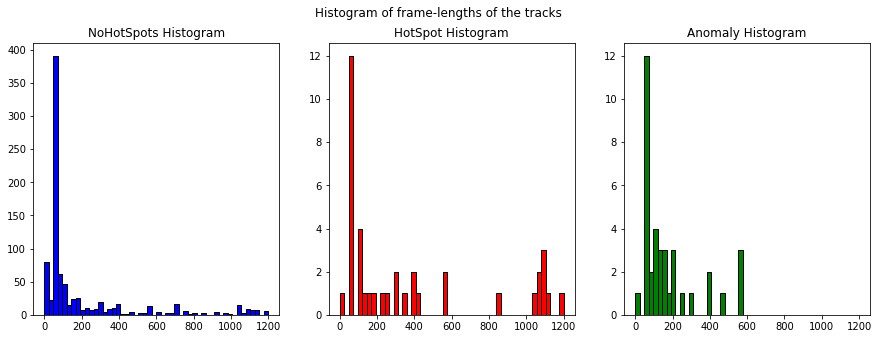

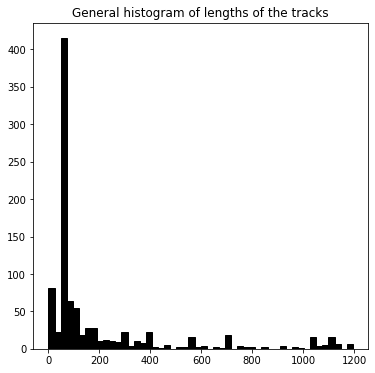


######### CENTROID DISPLACEMENT #########



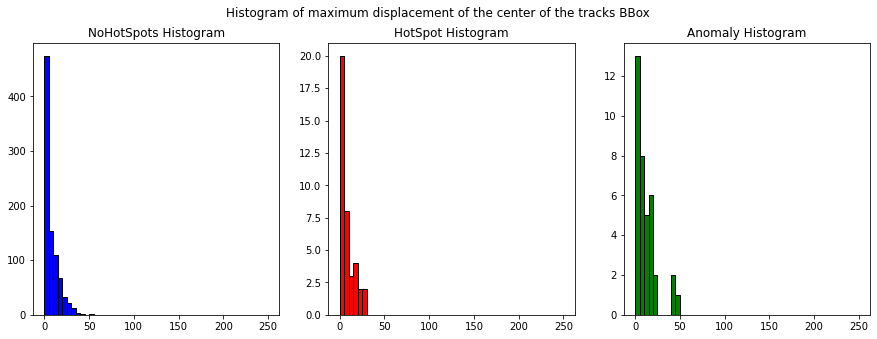

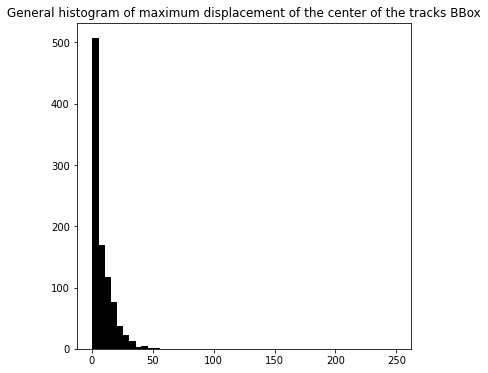


######### SIZE CHANGES #########



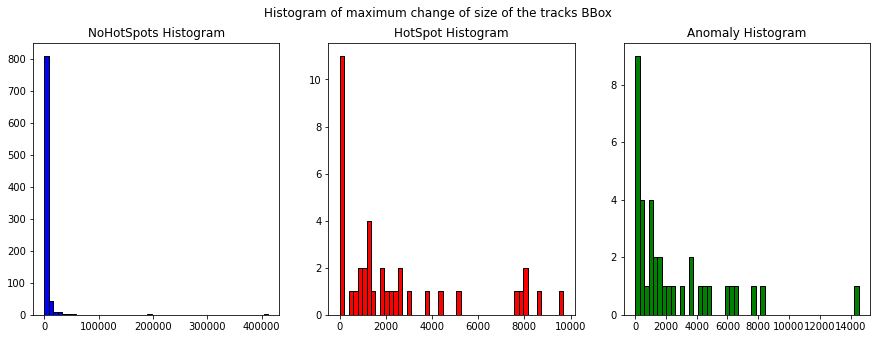

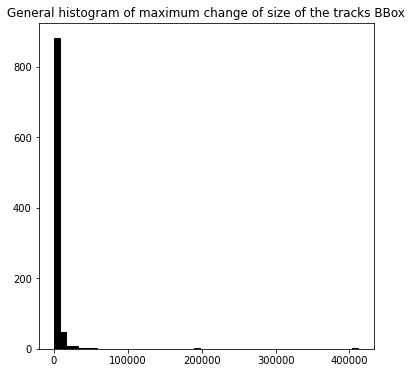


######### MEAN CALCULATIONS #########

NHS:	Mean TRACK LENGTH: 193.63 frames
HS:	Mean TRACK LENGTH: 381.28 frames
AN:	Mean TRACK LENGTH: 173.41 frames
GENERAL: Mean TRACK LENGTH: 200.54 frames

NHS:	Mean DISPLACEMENT: 6.81 pixels
HS:	Mean DISPLACEMENT: 7.52 pixels
NHS:	Mean DISPLACEMENT: 10.88 pixels
GENERAL: Mean DISPLACEMENT: 7.00 pixels

NHS:	Mean SIZE CHANGE: 2855.02 pixels2
NHS:	Mean CHANGE OF THE SIDES OF THE BBOX: 53.43 pixels
HS:	Mean SIZE CHANGE: 2394.69 pixels2
HS:	Mean CHANGE OF THE SIDES OF THE BBOX: 48.94 pixels
AN:	Mean SIZE CHANGE: 2461.46 pixels2
AN:	Mean CHANGE OF THE SIDES OF THE BBOX: 49.61 pixels
GENERAL: Mean SIZE CHANGE: 2820.83 pixels2
GENERAL: Mean CHANGE OF THE SIDES OF THE BBOX: 53.11 pixels


In [14]:
import math
# Plot

# TRACK LENGTH
print('######### TRACK LENGTH #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [trackLength_NHS, trackLength_HS, trackLength_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black", range=[0,1200])
    a[i].set_title(titles[i])
_ = f.suptitle('Histogram of frame-lengths of the tracks')
plt.show()


plt.figure(figsize=(6,6))
plt.title('General histogram of lengths of the tracks')                    
_ = plt.hist(trackLength_NHS + trackLength_HS + trackLength_AN, bins=50, color = "black", ec="black")
plt.show()

# CENTRIOD DISPLACEMENT
print('\n######### CENTROID DISPLACEMENT #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [distances_NHS, distances_HS, distances_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black", range=[0,250])
    a[i].set_title(titles[i])
_ = f.suptitle('Histogram of maximum displacement of the center of the tracks BBox')
plt.show()

plt.figure(figsize=(6,6))
plt.title('General histogram of maximum displacement of the center of the tracks BBox')                    
_ = plt.hist(distances_NHS + distances_HS + distances_AN, bins=50, color = "black", ec="black", range=[0,250])
plt.show()

# SIZE CHANGES
print('\n######### SIZE CHANGES #########\n')

f,a = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
histnames = [areas_NHS, areas_HS, areas_AN]
titles = ['NoHotSpots Histogram', 'HotSpot Histogram', 'Anomaly Histogram']
colors = ['b', 'r', 'g']

for i in range(len(a)):
    a[i].hist(histnames[i], bins=50, color = colors[i], ec="black")
    a[i].set_title(titles[i])
_ = f.suptitle('Histogram of maximum change of size of the tracks BBox')
plt.show()

plt.figure(figsize=(6,6))
plt.title('General histogram of maximum change of size of the tracks BBox')                    
_ = plt.hist(areas_NHS + areas_HS + areas_AN, bins=50, color = "black", ec="black")
plt.show()

# MEAN CALCULATIONS
print('\n######### MEAN CALCULATIONS #########\n')

print('NHS:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_NHS)/len(trackLength_NHS))))
print('HS:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_HS)/len(trackLength_HS))))
print('AN:\tMean TRACK LENGTH: {:.2f} frames'.format((sum(trackLength_AN)/len(trackLength_AN))))
print('GENERAL: Mean TRACK LENGTH: {:.2f} frames\n'.format((sum(trackLength_NHS+trackLength_HS+trackLength_AN)/len(trackLength_NHS+trackLength_HS+trackLength_AN))))

print('NHS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_NHS)/len(distances_NHS))))
print('HS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_HS)/len(distances_HS))))
print('NHS:\tMean DISPLACEMENT: {:.2f} pixels'.format((sum(distances_AN)/len(distances_AN))))
print('GENERAL: Mean DISPLACEMENT: {:.2f} pixels\n'.format((sum(distances_NHS+distances_HS+distances_AN)/len(distances_NHS+distances_HS+distances_AN))))

print('NHS:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_NHS)/len(areas_NHS))))
print('NHS:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_NHS)/len(areas_NHS))))

print('HS:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_HS)/len(areas_HS))))
print('HS:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_HS)/len(areas_HS))))

print('AN:\tMean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_AN)/len(areas_AN))))
print('AN:\tMean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_AN)/len(areas_AN))))

print('GENERAL: Mean SIZE CHANGE: {:.2f} pixels2'.format((sum(areas_NHS+areas_HS+areas_AN)/len(areas_NHS+areas_HS+areas_AN))))
print('GENERAL: Mean CHANGE OF THE SIDES OF THE BBOX: {:.2f} pixels'.format(math.sqrt(sum(areas_NHS+areas_HS+areas_AN)/len(areas_NHS+areas_HS+areas_AN))))


# print('Mean displacement: {:.2f} pixels'.format((sum(distances)/len(distances))))
# print('Mean area change: {:.2f} pixels2'.format(sum(areas)/len(areas)))
# print('The mean change of the sides of the BBox is: {:.2f} pixels'.format(math.sqrt(sum(areas)/len(areas))))

We can conclude that more or less all the tracks of different labels perform the same.

The tracks last around 200 frames, but in this case the HotSpots are often longer than the other two labels.

The tracks have very low movement, so having less frames rather than all the track would be a good idea since the images will be from the same part of the image. In other words, making a subsampling in the frames of the same track.

The sizes of the BBoxes change a little bit. However, since we already know that 92% of the BBoxes fit in squares of 224, we do not have to worry.

## 3 Data preparation

Function which is capable of loading multiple hdf5Loader and store the hdf5Loader obejects in a list

In [15]:
# INITIALIZE ALL THE HDF5LOADERS
from hdf5Loader import hdf5Loader

def hdf5Initializer(hdf5Names):
    """
    Function to load all the sequence loaders
    - hdf5Names:    list with all the filenames
    - return:       list with all de hdf5Loaders
    """
    loaders = []
    for n in hdf5Names:
        loaders.append(hdf5Loader(HDF5_FOLDER + n + '.h5'))

    return loaders

Function which is capable of loading the detections of all the files that are passed as parameters. The function has 2 features:


*   trackLevel = False: the function loads all the detections stored in the associated json file
*   trackLevel = True *(default)*: the function makes a subsampling of all the frames of the same track. It uses the parameter ***n***. The previous mentioned parameter is the number of frame of each track. The function take the samples with the same distance between each other.

In [16]:
# INITIALIZE ALL THE DETECTIONS AS:
# [seqNum, frameNum, trackID, xmin, ymin, xmax, ymax, label]
import math
from JSONLoader import loadData

def detectionLoader(jsonNamesList, trackLevel=True, n=5):
    """
    Function to load all the detections which are in .json files
    - jsonNamesList: list with all the filenames
    - trackLevel:
        if False:   load all the detections even though there are more than one
                    for a track
        if True:    load only one detections for track. Take as the thumbnail 
                    for the detection a frame of the middle
    - delta:    distance between the subsampling frames
    - return:   detections: list with all the detections
                            [seqNum, frameNum, trackID, BBox]
                labels:     list with all the labels of the previous list of
                            detections
    """
    detections = []
    labels = []

    # FRAME BY FRAME DETECTIONS
    # Add all the detectons of the file
    if not trackLevel:
        for seq in jsonNamesList:
            detections_i = loadData(JSON_FOLDER + seq + '.h5.json')
            seqNum = seq2num(seq)
            for d in detections_i:
                detections.append([seqNum, d[0], d[1], d[2], d[3], d[4], d[5]])
                labels.append(d[6])

    # TRACK DETECTIONS
    # Add one detection per track (the middle one)
    else:
        for seq in jsonNamesList:

            # Detections of each sequence of the list
            detections_i = loadData(JSON_FOLDER + seq + '.h5.json')
            # Number of the sequence
            seqNum = seq2num(seq)

            # List with all the detections with the same trackID            
            sameTrackID_detections = []
            trackID = 0

            for d in detections_i:
                if d[1] == trackID:
                    sameTrackID_detections.append(d)
                else:
                    # If we only want to take 1 frame per track, take the one in
                    # the center
                    if n == 1:
                        detections.append([seqNum,
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][0],
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][1],
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][2],
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][3],
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][4],
                                    sameTrackID_detections[(round(len(sameTrackID_detections)/2))][5]])
                        
                        labels.append(sameTrackID_detections[(round(len(sameTrackID_detections)/2))][6])
                        trackID = d[1]
                        sameTrackID_detections = []
                        sameTrackID_detections.append(d)

                    # If we want to take more than one frame per track, take
                    # them with the same distance
                    else:
                        # Distance between samples
                        delta = len(sameTrackID_detections) / (n-1)
                        for i in range(n):
                            fNum = math.floor(delta*i)
                            if fNum == len(sameTrackID_detections):
                                fNum = fNum - 1
                            detections.append([seqNum,
                                            sameTrackID_detections[fNum][0],
                                            sameTrackID_detections[fNum][1],
                                            sameTrackID_detections[fNum][2],
                                            sameTrackID_detections[fNum][3],
                                            sameTrackID_detections[fNum][4],
                                            sameTrackID_detections[fNum][5]]
                                            )
                            labels.append(sameTrackID_detections[fNum][6])

                        trackID = d[1]
                        sameTrackID_detections = []
                        sameTrackID_detections.append(d)                       

            # Add the final track detection
            if n == 1:
                detections.append([seqNum,
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][0],
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][1],
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][2],
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][3],
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][4],
                            sameTrackID_detections[(round(len(sameTrackID_detections)/2))][5]])
                
                labels.append(sameTrackID_detections[(round(len(sameTrackID_detections)/2))][6])
                trackID = d[1]
                sameTrackID_detections = []
                sameTrackID_detections.append(d)

            # If we want to take more than one frame per track, take
            # them with the same distance
            else:
                # Distance between samples
                delta = len(sameTrackID_detections) / (n-1)
                
                for i in range(n-1):
                    fNum = math.floor(delta*i)
                    if fNum == len(sameTrackID_detections):
                        fNum = fNum - 1
                    detections.append([seqNum,
                                    sameTrackID_detections[fNum][0],
                                    sameTrackID_detections[fNum][1],
                                    sameTrackID_detections[fNum][2],
                                    sameTrackID_detections[fNum][3],
                                    sameTrackID_detections[fNum][4],
                                    sameTrackID_detections[fNum][5]]
                                    )
                    labels.append(sameTrackID_detections[fNum][6])
    
    return detections, labels

To show how it works, the following block uses a delta to see how many detections the previous function has taken.

In [17]:
n=5
detections, labels = detectionLoader(usable_sequences, trackLevel=True, n=n)
print('Using n = {} we have:'.format(n))

def labelCounter(labels):
    count_HS = 0
    count_NHS = 0
    count_AN = 0
    for label in labels:
        if label == 0:
            count_NHS = count_NHS + 1
        elif label == 1:
            count_HS = count_HS + 1

        elif label == 2:
            count_AN = count_AN + 1

    print('NHS: {}'.format(count_NHS))
    print('HS: {}'.format(count_HS))
    print('AN: {}'.format(count_AN))
    print('TOTAL: {}'.format(count_NHS + count_HS + count_AN))

labelCounter(labels)

Using n = 5 we have:
NHS: 4351
HS: 205
AN: 185
TOTAL: 4741


Function which crops the detection into a square of **MAX_SQUARE_LEN x MAX_SQUARE_LEN**

First of all, the function looks for the side of the detection with the max length and crops it with a square of that length.
Then, the function resizes the square into another square with the desirable dimensions.

In [18]:
def crop_detection(image, detection):
    """
    Function to crop the detection in a square of the max length side and then
    resize it to a square MAX_SQUARE_LEN x MAX_SQUARE_LEN"
    - image:        np.ndarray(1024, 1280)
    - detection:    [xmin, ymin, xmax, ymax]
    - return:       np.ndarray(MAX_SQUARE_LEN, MAX_SQUARE_LEN)
    """
    
    # Find the min point of the square detection
    x_diff = detection[2] - detection[0]
    y_diff = detection[3] - detection[1]
    max_len = max(x_diff, y_diff)
    xmin = ((x_diff - max_len) / 2) + detection[0]
    ymin = ((y_diff - max_len) / 2) + detection[1]

    # If image limits exceeded
    if xmin < 0:
        xmin = 0
    if ymin < 0:
        ymin = 0
    if (xmin + max_len) > image.shape[1]:
        xmin = image.shape[1] - max_len
    if (ymin + max_len) > image.shape[0]:
        ymin = image.shape[0] - max_len

    xmin = int(xmin)
    ymin = int(ymin)
    max_len = int(max_len)
    # Crop and resize the image
    crop_image = image[ymin:(ymin+max_len), xmin:(xmin+max_len)]
    resized_image = cv2.resize(crop_image, (MAX_SQUARE_LEN, MAX_SQUARE_LEN), interpolation=cv2.INTER_NEAREST)
    
    return resized_image


We have a total number of 951 **tracks** with:

*   NoHotSpots: 873
*   HotSpots: 41
*   Anomalies: 37

So, to show how the function **crop_detections(.)** works, in the following block one random detections for each label is going to be shown.

In the first column of the graphs the original image can be seen, whereas in the second column the cropped detection of size MAX_SQUARE_LEN x MAX_SQUARE_LEN is shown. If the original Bounding Box is smaller than the previuos mencioned size the BBox can be seen.

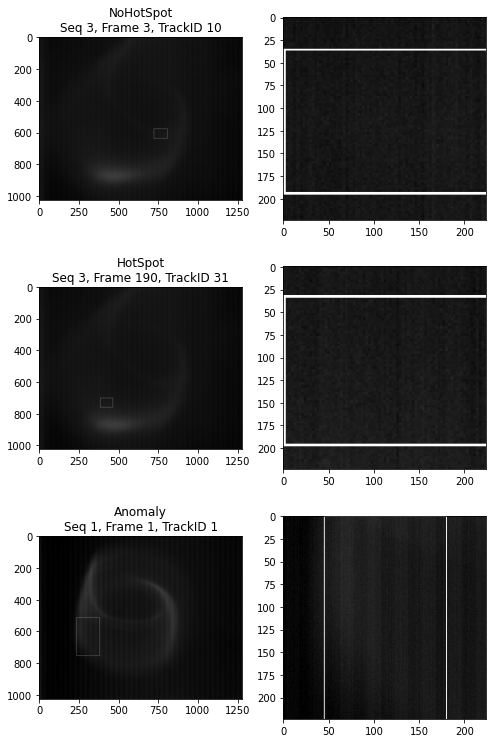

In [19]:
from hdf5Loader import hdf5Loader
from image_tools import plotBBoxes, rescaleImage, showImage
import random

# Get the 6 random files
# Change the seed to get other detections
random.seed(42)
NHS = random.randint(0, 873)
HS = random.randint(0, 41)		
AN = random.randint(0, 37)

# Load all the track detections
detections, labels = detectionLoader(usable_sequences, trackLevel=True)
NHS_counter = 0
HS_counter = 0
AN_counter = 0

# List in which the three detections are stored
# 0: NoHotSpot
# 1: HotSpot
# 2: Anomaly
d3 = [None] * 3

# Obtain the random detections
for (detection, label) in zip(detections, labels):
    if label == 0:
        NHS_counter = NHS_counter + 1
    elif label == 1:
        HS_counter = HS_counter + 1
    elif label == 2:
        AN_counter = AN_counter + 1

    if NHS_counter == NHS:
        d3[0] = detection
    if HS_counter == HS:
        d3[1] = detection
    if AN_counter == AN:
        d3[2] = detection


# Obtain the filenames of the random detections
files2Load = [num2seq(d3[0][0]), num2seq(d3[1][0]), num2seq(d3[2][0])]
# Obtain the hdf5Loaders of the previous sequences
loaders = hdf5Initializer(files2Load)

# 1. Obtain the original images of the sequences
# 2. Rescale the dynamic range to be able to visualize them
# 3. Draw the BBoxes of the detections in the origianl images
OGims = []
for (loader, detection) in zip(loaders, d3):
    im_t = loader.loadImage(detection[0])

    im_t = rescaleImage(im_t)

    detection = [detection[3:7]]
    im_t = plotBBoxes(im_t, detection)

    OGims.append(im_t)

# Obtain the cropped images
cropped_ims = []
for (image, detection) in zip(OGims, d3):
    BBox = detection[3:7]
    cropped_ims.append(crop_detection(image, BBox))

# Plot images
f, axarr = plt.subplots(nrows=3, ncols=2, figsize=(8,13))
titles = ['NoHotSpot\nSeq {}, Frame {}, TrackID {}',
          'HotSpot\nSeq {}, Frame {}, TrackID {}',
          'Anomaly\nSeq {}, Frame {}, TrackID {}']

for i in range(len(cropped_ims)):
        axarr[i,0].imshow(OGims[i])
        axarr[i,1].imshow(cropped_ims[i])
        axarr[i,0].title.set_text(titles[i].format(d3[i][0], d3[i][1], d3[i][2]))


## 4 Custom Dataset and DataLoader


We will use a map-style dataset, which is the one that implements *__getitem__()* and *__len__()* protocols, and represents a map from indices/keys to data samples.

Now we have:

*   A list which contains all the hdf5Loader objects.
*   A list with all the detections:

    [seqNum, frameNumber, trackID, xmin, ymin, xmax, ymax]


*   A list with all the labels linked with the detections. In other words, the detection in position x has its label in the position x of the list of labels.

So, the total number of detections is the length of the detections or labels list. To obtain the image linked to the detection, we will have to look for the ***seqNum*** of the detection to know from which file is the detection from. Then, we will have to look for the ***frameNumber*** of the detection and load it using the list of hdf5Loaders. Once the image is loaded, we will use the function previously created called ***crop_detection()*** to obtain an image with only the detection part of the frame with size 224 x 224. Afterwards, we will have the possibility of applying some transforms. In our case the most important one is triple the output image since the input of the pre-trained Neural Networks has been done with RGB images and our sequences are in gray-scale.




In [20]:
import torch
from hdf5Loader import hdf5Loader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class Dataset(Dataset):
    def __init__(self, loaders, labels, detections, transform=None):
        'Initialization'
        self.loaders = loaders
        self.labels = labels
        self.detections = detections
        self.transform = transform
    
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.detections)

    def __getitem__(self, index):
        'Generates one sample of data'
        # With the selected index obtain the sample
        seqNum = self.detections[index][0]
        frameNum = self.detections[index][1]
        # Load data(image and BBox) and get label
        image = self.loaders[(seqNum-1)].loadImage(frameNum)
        BBox = [self.detections[index][2], self.detections[index][3], self.detections[index][4], self.detections[index][5]]
        resized_image = crop_detection(image, BBox)
        # Triple the image to have 3 channels
        resized_image = np.stack((resized_image,)*3, axis=-1)
        resized_image = np.moveaxis(resized_image, -1, 0)
        y = self.labels[index]

        if self.transform:
            resized_image_float = ((1/4095) * resized_image).astype(np.float16)
            resized_image = torch.Tensor(resized_image_float)
            # resized_image = self.transform(resized_image)
            y = self.labels[index]

        return resized_image, y

Now, we have a dataset that contains both the training and validation set. The perfect way to split them would be using *SubsetRandomSampler* from *torch.utils.data.sampler* . The dataset however, has an imbalanced class ratio and we can only pass one type of sampler to the *DataLoader* function. So, we will implement a custom *SubsetRandomSampler* funtion to divide the dataset into two sets of 80% (train) and 20% (validation). 

The following block will randomly select the 80% and 20% of all the labels to obtain two diffent dataset with:

*   The 80% of the NHS, the 80% of the HS and the 80% of the AN.
*   THe 20% of the NHS, the 20% of the HS and the 20% of the AN.

At the end of the function a bar plot can be seen with all the detections of each dataset to have a general conception.

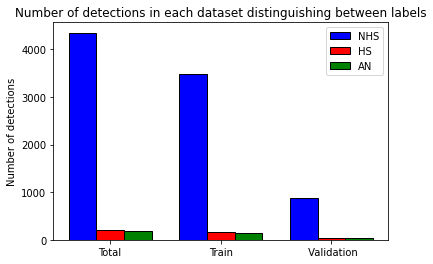


######### OUTPUT #########

Initial dataset:
NHS: 4351
HS: 205
AN: 185
TOTAL: 4741

Train Dataset:
NHS: 3480
HS: 164
AN: 148
TOTAL: 3792

Train Dataset:
NHS: 871
HS: 41
AN: 37
TOTAL: 949


In [21]:
import math

# Load the dataset
detections, labels = detectionLoader(usable_sequences, trackLevel=True, n=5)

# List of the detections of each label
d_NHS = []
d_HS = []
d_AN = []

# Classify the detections by labels 
for detection, label in zip(detections, labels):
    if label == 0:
        d_NHS.append(detection)
    elif label == 1:
        d_HS.append(detection)
    elif label == 2:
        d_AN.append(detection)

# The 80% of each class has to go to the train_dataset
# The other 20% to the validation_dataset
num_train_NHS = math.floor(0.8 * len(d_NHS))
num_train_HS = math.floor(0.8 * len(d_HS))
num_train_AN = math.floor(0.8 * len(d_AN))

# Shuffle the list and take the first 80% of the detecions and the last 20%
random.seed(42)
random.shuffle(d_NHS)
random.shuffle(d_HS)
random.shuffle(d_AN)

# Train dataset and labels
train_detections = d_NHS[:num_train_NHS] + d_HS[:num_train_HS] + d_AN[:num_train_AN]
train_labels = np.concatenate((np.zeros(num_train_NHS, dtype=int),
                               np.ones(num_train_HS, dtype=int),
                               2 * np.ones(num_train_AN, dtype=int)))
train_labels = train_labels.tolist()

# Validation dataset and labels
# Validation dataset and labels
validation_detections = d_NHS[num_train_NHS:] + d_HS[num_train_HS:] + d_AN[num_train_AN:]
validation_labels = np.concatenate((np.zeros(len(d_NHS) - num_train_NHS, dtype=int),
                               np.ones(len(d_HS) - num_train_HS, dtype=int),
                               2 * np.ones(len(d_AN) - num_train_AN, dtype=int)))
validation_labels = validation_labels.tolist()

# Shuffle both datasets
z = list(zip(train_detections, train_labels))
random.shuffle(z)
train_detections, train_labels = zip(*z)

z = list(zip(validation_detections, validation_labels))
random.shuffle(z)
validation_detections, validation_labels = zip(*z)

# Plot
n_groups = 3

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

rects1 = plt.bar(index, (labels.count(0),
                         train_labels.count(0),
                         validation_labels.count(0)),
                 bar_width, color='b', ec="black", label='NHS')

rects2 = plt.bar(index + bar_width, (labels.count(1),
                                     train_labels.count(1),
                                     validation_labels.count(1)),
                 bar_width, color='r', ec="black", label='HS')

rects3 = plt.bar(index + 2*bar_width, (labels.count(2),
                                         train_labels.count(2),
                                         validation_labels.count(2)),
                 bar_width, color='g', ec="black", label='AN')

plt.ylabel('Number of detections')
plt.title('Number of detections in each dataset distinguishing between labels')
plt.xticks(index + bar_width, ('Total', 'Train', ' Validation'))

# plt.tight_layout()
plt.legend()
plt.show()

print('\n######### OUTPUT #########\n')
print('Initial dataset:')
labelCounter(labels)
print('\nTrain Dataset:')
labelCounter(train_labels)
print('\nTrain Dataset:')
labelCounter(validation_labels)

Now we have two datasets, but they are extremely imbalanced. So, using the sampler ***WeightedRandomSampler*** we will balance the training dataset. 

In [22]:
from torch.utils.data import DataLoader, WeightedRandomSampler
from image_tools import showImage, rescaleImage
import time

t = time.time()
loaders = hdf5Initializer(usable_sequences)

transform = True
# transform = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# We have already loaded the detections and labels separated
# in train and validation

train_dataset = Dataset(loaders, train_labels,
                        train_detections, transform=transform)
validation_dataset = Dataset(loaders, validation_labels,
                             validation_detections, transform=transform)

train_class_weights = [1/train_labels.count(0),
                       1/train_labels.count(1),
                       1/train_labels.count(2)]
validation_class_weights = [1/validation_labels.count(0),
                            1/validation_labels.count(1),
                            1/validation_labels.count(2)]

train_sample_weights = [0] * len(train_dataset)
validation_sample_weights = [0] * len(validation_dataset)

print('Obtaining weigths of the training dataset')
for idx, (_, label) in enumerate(train_dataset):
    train_class_weight = train_class_weights[label]
    train_sample_weights[idx] = train_class_weight

train_sampler = WeightedRandomSampler(train_sample_weights,
                                      num_samples=len(train_sample_weights),
                                      replacement = True)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              sampler=train_sampler,
                              num_workers=2)

validation_dataloader = DataLoader(dataset=validation_dataset,
                              batch_size=64,
                              num_workers=2)

elapsed = time.time() - t
print('Elapsed time creating the dataloaders: {:.2f} min'.format(elapsed/60))

Obtaining weigths of the training dataset
Elapsed time creating the dataloaders: 22.64 min


Test both dataloadets with only 1 batch.

Observe the batch shape.

Show a bar plot to allow the comparison.

Loading 1 training batch
	data batch shape: torch.Size([32, 3, 224, 224])
	labels batch shape: torch.Size([32])
	Elapsed time reading 1 training batch: 0.33 min

Loading 1 validation batch
	data batch shape: torch.Size([64, 3, 224, 224])
	labels batch shape: torch.Size([64])
	Elapsed time reading 1 validation batch: 0.46 min

Total elapsed time reading 2 batches: 0.79 min



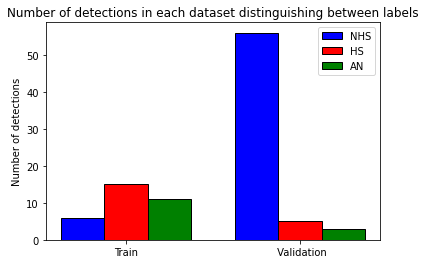


######### OUTPUT #########

Training dataset (balanced):
	NHS: 6
	HS: 15
	AN: 11

Validation dataset (imbalanced):
	NHS: 56
	HS: 5
	AN: 3


In [23]:
import time

tTotal = time.time()

train_counter_NHS = 0
train_counter_HS = 0
train_counter_AN = 0

validation_counter_NHS = 0
validation_counter_HS = 0
validation_counter_AN = 0

t = time.time()
print('Loading 1 training batch')

for data, labels in train_dataloader:
    print('\tdata batch shape:', data.shape)
    print('\tlabels batch shape:', labels.shape)
    train_counter_NHS += torch.sum(labels==0)
    train_counter_HS += torch.sum(labels==1)
    train_counter_AN += torch.sum(labels==2)
    break

elapsed = time.time() - t
print('\tElapsed time reading 1 training batch: {:.2f} min\n'.format(elapsed/60))

t = time.time()
print('Loading 1 validation batch')

for data, labels in validation_dataloader:
    print('\tdata batch shape:', data.shape)
    print('\tlabels batch shape:', labels.shape)
    validation_counter_NHS += torch.sum(labels==0)
    validation_counter_HS += torch.sum(labels==1)
    validation_counter_AN += torch.sum(labels==2)
    break

elapsed = time.time() - t
print('\tElapsed time reading 1 validation batch: {:.2f} min\n'.format(elapsed/60))

eT = time.time() - tTotal
print('Total elapsed time reading 2 batches: {:.2f} min\n'.format(eT/60))

# Plot
n_groups = 2

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25

rects1 = plt.bar(index, (train_counter_NHS, validation_counter_NHS),
                 bar_width, color='b', ec="black", label='NHS')

rects2 = plt.bar(index + bar_width, (train_counter_HS,
                                     validation_counter_HS),
                 bar_width, color='r', ec="black", label='HS') 

rects3 = plt.bar(index + 2*bar_width, (train_counter_AN,
                                     validation_counter_AN),
                 bar_width, color='g', ec="black", label='AN')      
        
plt.ylabel('Number of detections')
plt.title('Number of detections in each dataset distinguishing between labels')
plt.xticks(index + bar_width, ('Train', ' Validation'))

plt.legend()
plt.show()

print('\n######### OUTPUT #########\n')
print('Training dataset (balanced):')
print('\tNHS: {}'.format(train_counter_NHS))
print('\tHS: {}'.format(train_counter_HS))
print('\tAN: {}'.format(train_counter_AN))
print('\nValidation dataset (imbalanced):')
print('\tNHS: {}'.format(validation_counter_NHS))
print('\tHS: {}'.format(validation_counter_HS))
print('\tAN: {}'.format(validation_counter_AN))

## 5 ResNet


IN  PROGRESS

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [37]:
from torchvision.models import resnet50
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

if not torch.cuda.is_available():
    raise Exception("You shoould enable GPU in the Runtime menu")
device = torch.device('cuda')

pretrained_model = resnet50(pretrained=True)

num_ftrs = pretrained_model.fc.in_features

pretrained_model.fc = nn.Linear(num_ftrs, 3)

pretrained_model = pretrained_model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(pretrained_model.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [38]:
dataloaders = {'train': train_dataloader, 'val': validation_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(validation_dataset)}

In [39]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val
        self.count += n
        self.avg = self.sum / self.count

In [40]:
import copy
from tqdm.notebook import tqdm as tqdm
from sklearn.metrics import multilabel_confusion_matrix

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Metrics
    train_accuracies_b, train_losses_b, val_accuracies_b, val_losses_b = [], [], [], []
    train_accuracies_e, train_losses_e, val_accuracies_e, val_losses_e = [], [], [], []
    confusion_matrix = np.zeros((3, 2, 2), dtype=int )

    train_accuracy = AverageMeter()
    train_loss = AverageMeter()
    val_accuracy = AverageMeter()
    val_loss = AverageMeter()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train','val']:

            # Reset the metrics at the beggining of each epoch
            train_accuracy.reset()
            train_loss.reset()
            val_loss.reset()
            val_accuracy.reset()

            if phase == 'train':
                # Set model to training mode
                model.train()
            else:
                # Set model to evaluate mode
                model.eval()
   
            running_loss = 0.0
            running_corrects = 0

            # For printing the progress bar
            loop = tqdm(dataloaders[phase], unit=" batches")

            # Iterate over data.
            for inputs, labels in loop:
                if phase == 'train':
                    loop.set_description('[TRAIN] Epoch {}/{}'.format(epoch + 1, num_epochs))

                else:
                    loop.set_description('[VAL] Epoch {}/{}'.format(epoch + 1, num_epochs))

                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Calculate the metrics
                    k = [True for i in range(len(labels)) if labels[i] == preds[i]]
                    acc = len(k)

                    # Update the metrics
                    if phase == 'train':
                        train_accuracy.update(acc, n=len(labels))
                        train_loss.update(loss.item(), n=len(labels))
                    else:
                        val_accuracy.update(acc, n=len(labels))
                        val_loss.update(loss.item(), n=len(labels))                        
                    
                    if phase == 'train':
                        train_losses_b.append(train_loss.avg)
                        train_accuracies_b.append(train_accuracy.avg)
                    else:
                        val_losses_b.append(val_loss.avg)
                        val_accuracies_b.append(val_accuracy.avg)

                    if phase == 'val' and epoch == num_epochs - 1:
                        confusion_matrix = confusion_matrix + multilabel_confusion_matrix(labels.cpu(),
                                                                                          preds.cpu(),
                                                                                          labels=[0, 1, 2])
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    loop.set_postfix(loss=train_loss.avg, accuracy=train_accuracy.avg)
                else:
                    loop.set_postfix(loss=val_loss.avg, accuracy=val_accuracy.avg)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
                train_losses_e.append(train_loss.avg)
                train_accuracies_e.append(train_accuracy.avg)
            else:
                val_losses_e.append(val_loss.avg)
                val_accuracies_e.append(val_accuracy.avg)
                

            print('{} Loss: {:.4f} Acc: {:.4f}\n'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_accuracies_b, train_losses_b, val_accuracies_b, val_losses_b, train_accuracies_e, train_losses_e, val_accuracies_e, val_losses_e, confusion_matrix


In [41]:
model, train_accuracies_b, train_losses_b, val_accuracies_b, val_losses_b, train_accuracies_e, train_losses_e, val_accuracies_e, val_losses_e, confusion_matrix = train_model(
    pretrained_model,
    criterion,
    optimizer_ft,
    exp_lr_scheduler,
    num_epochs=6)

Epoch 1/6
----------



train Loss: 0.4848 Acc: 0.7998




val Loss: 0.2160 Acc: 0.9305


Epoch 2/6
----------



train Loss: 0.0849 Acc: 0.9784




val Loss: 0.1111 Acc: 0.9473


Epoch 3/6
----------



train Loss: 0.0235 Acc: 0.9971




val Loss: 0.0625 Acc: 0.9831


Epoch 4/6
----------



train Loss: 0.0139 Acc: 0.9976




val Loss: 0.0618 Acc: 0.9821


Epoch 5/6
----------



train Loss: 0.0116 Acc: 0.9984




val Loss: 0.0634 Acc: 0.9800


Epoch 6/6
----------



train Loss: 0.0052 Acc: 1.0000




val Loss: 0.0490 Acc: 0.9863


Training complete in 77m 8s
Best val Acc: 0.986301


In [ ]:
epochs = range(len(train_accuracies_e))

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(epochs, train_accuracies_e, 'b', label='Training acc')
axs[0, 0].plot(epochs, val_accuracies_e, 'r', label='Validation acc')
axs[0, 0].set_title('Train/Val Epoch Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].legend()

axs[0, 1].plot(epochs, train_losses_e, 'b', label='Training loss')
axs[0, 1].plot(epochs, val_losses_e, 'r', label='Validation loss')
axs[0, 1].set_title('Train/Val Epoch Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].legend()

train_batches = range(len(train_accuracies_b))
validation_batches = np.linespace(0, len(train_accuracies) - 1, len(train_accuracies)/2 )

axs[1, 0].plot(train_batches, train_losses_e, 'b', label='Training acc')
axs[1, 0].plot(validation_batches, val_losses_e, 'r', label='Validation acc')
axs[1, 0].set_title('Train/Val Batch Accuracy')
axs[1, 0].set_xlabel('Batches')
axs[1, 0].legend()

axs[1, 1].plot(train_batches, train_losses_e, 'b', label='Training loss')
axs[1, 1].plot(validation_batches, val_losses_e, 'r', label='Validation loss')
axs[1, 1].set_title('Train/Val Batch Loss')
axs[1, 1].set_xlabel('Batches')
axs[1, 1].legend()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm=confusion_matrix,
                      classes=[0, 1, 2],
                      normalize=True,
                      title='Confusion Matrix')

In [ ]:
import torch
from torchvision.models import resnet50
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

if not torch.cuda.is_available():
    raise Exception("You should enable GPU in the Runtime menu")
device = torch.device("cuda")

# Load the pretrained ResNet50 model
pretrained_model = resnet50(pretrained=True)


# ResNet Block Structure:
# 1. Conv2d
# 2. BatchNorm2d
# 3. ReLU
# 4. MaxPool2d
# 5. Sequential bottleneck
# 6. Sequential bottleneck
# 7. Sequential bottleneck
# 8. Sequential bottleneck
# 9. AdaptativeAvgPool2d
# 10. Linear Layer

# So, if we want to fine-tune from the last Sequential bottleneck until the end
# we have to freeze the first 7 blocks

# count = 0
# for child in pretrained_model.children():
#     if count < 7:
#         for param in child.parameters():
#             param.requires_grad = False
#     count = count + 1

# Create a new FC layer
num_ftrs = pretrained_model.fc.in_features
pretrained_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(),
    nn.Linear(128, 3)
)

pretrained_model = pretrained_model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [62]:
# Testing for confusion matrix
from sklearn.metrics import multilabel_confusion_matrix

y_true = torch.tensor([0, 0, 1, 0, 1, 2])
y_pred = torch.tensor([0, 1, 1, 0, 0, 2])

t_matrix = multilabel_confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
t_matrix.shape

# print(len(y_true))
# y_true = [0, 2, 2, 1, 0, 0]
# y_pred = [0, 1, 1, 0, 0, 2]

# temporal_matrix = temporal_matrix + multilabel_confusion_matrix(y_true,
#                                                                 y_pred,
#                                                                 labels=[0, 1, 2])

# temporal_matrix

(3, 2, 2)